# To test the input parameter for the DTDs.

In [13]:
import sygma as s
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/christian/test/ipython/IPython/kernel/__init__.py:10: UserWarning: The `IPython.kernel` package has been deprecated. You should import from ipython_kernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated. "


# Gaussian 

## gauss_dtd=[3.3e9,6.6e8] (as used in Wiersma09)

In [14]:
gauss_dtd=[1e9,6.6e8]

In [8]:
reload(s)
s2=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_rate='gauss',gauss_dtd=gauss_dtd,imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=True, sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s2.history.ism_iso_yield_1a[-1][0]
zm_lifetime_grid=s2.zm_lifetime_grid_current
idx_z = (np.abs(zm_lifetime_grid[0]-0.0001)).argmin() #Z=0
grid_masses=zm_lifetime_grid[1][::-1]
grid_lifetimes=zm_lifetime_grid[2][idx_z][::-1]
spline_degree1=2
smoothing1=0
boundary=[None,None]
spline = UnivariateSpline(grid_lifetimes,np.log10(grid_masses),bbox=boundary,k=spline_degree1,s=smoothing1)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.87s


9999999.99403
10000000.0
Should be 1:  0.999999999403


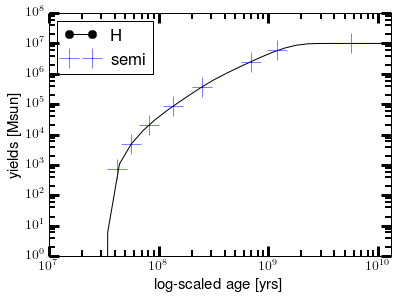

In [15]:
from scipy.integrate import dblquad
def spline1(x):
    #x=t
    return max(3.,10**spline(np.log10(x)))
def f_wd_dtd(m,t):
        #print 'time ',t
        #print 'mass ',m
        mlim=10**spline(np.log10(t))
        #print 'mlim',mlim
        if mlim>8.:
                #print t
                #print mlim
                return 0
        else:
                #mmin=max(3.,massfunc(t))
                #mmax=8.
                #imf=self.__imf(mmin,mmax,1)
                #Delay time distribution function (DTD)
                [1e9,6.6e8]
                tau=  gauss_dtd[0] #1e9 #3.3e9 #characteristic delay time
                sigma=gauss_dtd[1]  #0.66e9#0.25*tau 
                #sigma=0.2#narrow distribution
                #sigma=0.5*tau #wide distribution
                mmin=0
                mmax=0
                inte=0
                def g2(mm):
                    return mm*mm**-2.35
                norm=1./quad(g2,1,30)[0]
                #imf normalized to 1Msun
                return  norm*m**-2.35* 1./np.sqrt(2*np.pi*sigma**2) * np.exp(-(t-tau)**2/(2*sigma**2))
                
#a= 0.0069 #normalization parameter
#if spline(np.log10(t))
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0] )
n1a= a* dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]            
Yield_tot=n1a*1e11*0.1 #special factor
print Yield_tot_sim
print Yield_tot
print 'Should be 1: ', Yield_tot_sim/Yield_tot
s2.plot_mass(specie='H',source='sn1a',label='H',color='k',shape='-',marker='o',markevery=800)
yields1=[]
ages1=[]
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
for m1 in m:
    t=ages[m.index(m1)]
    yields= a* dblquad(f_wd_dtd,0,t,lambda x: spline1(x), lambda x: 8)[0] *1e11*0.1 #special factor
    yields1.append(yields)
    ages1.append(t)
plt.plot(ages1,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=2)
plt.show()

## gauss_dtd=[4e9,3.2e9] (as mentioned in Wiersma09)

In [17]:
gauss_dtd=[4e9,2e9]

In [18]:
reload(s)
s2=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_rate='gauss',gauss_dtd=gauss_dtd,imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt',sn1a_on=True, sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s2.history.ism_iso_yield_1a[-1][0]
zm_lifetime_grid=s2.zm_lifetime_grid_current
idx_z = (np.abs(zm_lifetime_grid[0]-0.0001)).argmin() #Z=0
grid_masses=zm_lifetime_grid[1][::-1]
grid_lifetimes=zm_lifetime_grid[2][idx_z][::-1]
spline_degree1=2
smoothing1=0
boundary=[None,None]
spline = UnivariateSpline(grid_lifetimes,np.log10(grid_masses),bbox=boundary,k=spline_degree1,s=smoothing1)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.58s


10000051.6885
10000000.0
Should be 1:  1.00000516885


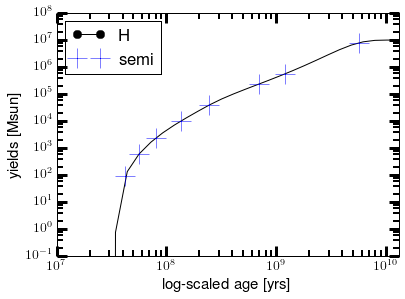

In [19]:
from scipy.integrate import dblquad
def spline1(x):
    #x=t
    return max(3.,10**spline(np.log10(x)))
def f_wd_dtd(m,t):
        #print 'time ',t
        #print 'mass ',m
        mlim=10**spline(np.log10(t))
        #print 'mlim',mlim
        if mlim>8.:
                #print t
                #print mlim
                return 0
        else:
                #mmin=max(3.,massfunc(t))
                #mmax=8.
                #imf=self.__imf(mmin,mmax,1)
                #Delay time distribution function (DTD)
                [1e9,6.6e8]
                tau=  gauss_dtd[0] #1e9 #3.3e9 #characteristic delay time
                sigma=gauss_dtd[1]  #0.66e9#0.25*tau 
                #sigma=0.2#narrow distribution
                #sigma=0.5*tau #wide distribution
                mmin=0
                mmax=0
                inte=0
                def g2(mm):
                    return mm*mm**-2.35
                norm=1./quad(g2,1,30)[0]
                #imf normalized to 1Msun
                return  norm*m**-2.35* 1./np.sqrt(2*np.pi*sigma**2) * np.exp(-(t-tau)**2/(2*sigma**2))
                
#a= 0.0069 #normalization parameter
#if spline(np.log10(t))
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0] )
n1a= a* dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]            
Yield_tot=n1a*1e11*0.1 #special factor
print Yield_tot_sim
print Yield_tot
print 'Should be 1: ', Yield_tot_sim/Yield_tot
s2.plot_mass(specie='H',source='sn1a',label='H',color='k',shape='-',marker='o',markevery=800)
yields1=[]
ages1=[]
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
for m1 in m:
    t=ages[m.index(m1)]
    yields= a* dblquad(f_wd_dtd,0,t,lambda x: spline1(x), lambda x: 8)[0] *1e11*0.1 #special factor
    yields1.append(yields)
    ages1.append(t)
plt.plot(ages1,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=2)
plt.show()

# Exponential

## exp_dtd (as used in Wiersma09) 2e9

In [27]:
exp_dtd=2e9

SYGMA run in progress..
   SYGMA run completed - Run time: 1.04s


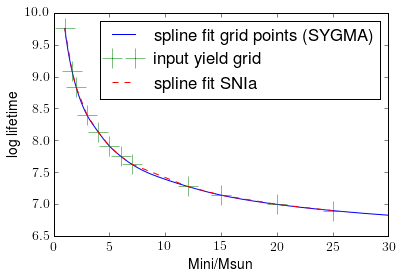

In [23]:
#import read_yields as ry
import sygma as s
reload(s)
#interpolate_lifetimes_grid=s22.__interpolate_lifetimes_grid
#ytables=ry.read_nugrid_yields('yield_tables/isotope_yield_table_h1.txt')
#zm_lifetime_grid=interpolate_lifetimes_grid(ytables,iolevel=0) 1e7
s1=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_on=True,sn1a_rate='exp',exp_dtd=exp_dtd,imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt', sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s1.history.ism_iso_yield_1a[-1][0]
zm_lifetime_grid=s1.zm_lifetime_grid_current
idx_z = (np.abs(zm_lifetime_grid[0]-0.0001)).argmin() #Z=0
grid_masses=zm_lifetime_grid[1][::-1]
grid_lifetimes=zm_lifetime_grid[2][idx_z][::-1]
spline_degree1=2
smoothing1=0
boundary=[None,None]
spline_lifetime = UnivariateSpline(grid_lifetimes,np.log10(grid_masses),bbox=boundary,k=spline_degree1,s=smoothing1)
plt.plot(grid_masses,grid_lifetimes,label='spline fit grid points (SYGMA)')
plt.xlabel('Mini/Msun')
plt.ylabel('log lifetime')
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
plt.plot(np.array(m),np.log10(np.array(ages)),marker='+',markersize=20,label='input yield grid',linestyle='None')
plt.plot(10**spline_lifetime(np.log10(ages)),np.log10(ages),linestyle='--',label='spline fit SNIa')
plt.legend()
#plt.yscale('log')

10000000.0201
10000000.0
Should be :  1.00000000201


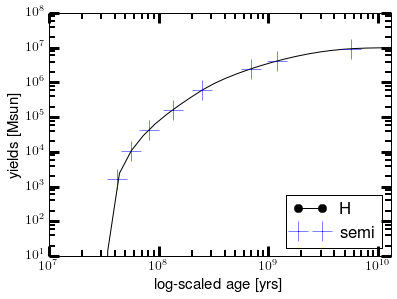

In [25]:
#following inside function wiersma09_efolding

#if timemin ==0:
#    timemin=1

from scipy.integrate import dblquad
def spline1(x):
    #x=t
    minm_prog1a=3
    #if minimum progenitor mass is larger than 3Msun due to IMF range:
    #if self.imf_bdys[0]>3:
    #    minm_prog1a=self.imf_bdys[0]
    return max(minm_prog1a,10**spline_lifetime(np.log10(x)))


def f_wd_dtd(m,t):
                #print 'time ',t
                #print 'mass ',m
                mlim=10**spline_lifetime(np.log10(t))
                maxm_prog1a=8
                #if maximum progenitor mass is smaller than 8Msun due to IMF range:
                #if 8>self.imf_bdys[1]:
                #        maxm_prog1a=self.imf_bdys[1]
                if mlim>maxm_prog1a:
                        return 0
                else:
                        #Delay time distribution function (DTD)
                        tau=  2e9
                        mmin=0
                        mmax=0
                        inte=0
                #follwing is done in __imf()
                def g2(mm):
                    return mm*mm**-2.35
                norm=1./quad(g2,1,30)[0]
                #print 'IMF test',norm*m**-2.35
                #imf normalized to 1Msun
                return  norm*m**-2.35* np.exp(-t/tau)/tau
                
a= 0.01 #normalization parameter
#if spline(np.log10(t))
#a=1e-3/()
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   )
n1a= a* dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   
# in principle since normalization is set: nb_1a_per_m the above calculation is not necessary anymore
Yield_tot=n1a*1e11*0.1 *1 #7 #special factor
print Yield_tot_sim
print Yield_tot
print 'Should be : ', Yield_tot_sim/Yield_tot
s1.plot_mass(specie='H',source='sn1a',label='H',color='k',shape='-',marker='o',markevery=800)
yields1=[]
ages1=[]
a= 0.01 #normalization parameter
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   )
for m1 in m:
    t=ages[m.index(m1)]
    yields= a* dblquad(f_wd_dtd,0,t,lambda x: spline1(x), lambda x: 8)[0] *1e11*0.1 #special factor 
    yields1.append(yields)
    ages1.append(t)
plt.plot(ages1,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=4)

## exp_dtd (as used in Wiersma09)

In [36]:
exp_dtd=10e9

SYGMA run in progress..
   SYGMA run completed - Run time: 0.84s


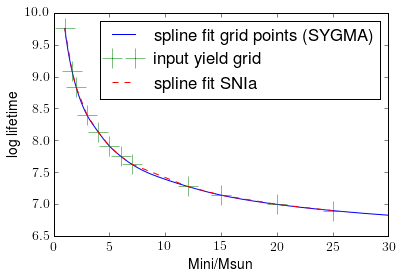

In [37]:
#import read_yields as ry
import sygma as s
reload(s)
#interpolate_lifetimes_grid=s22.__interpolate_lifetimes_grid
#ytables=ry.read_nugrid_yields('yield_tables/isotope_yield_table_h1.txt')
#zm_lifetime_grid=interpolate_lifetimes_grid(ytables,iolevel=0) 1e7
s1=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,sn1a_on=True,sn1a_rate='exp',exp_dtd=exp_dtd,imf_type='salpeter',imf_bdys=[1,30],hardsetZ=0.0001,table='yield_tables/isotope_yield_table_h1.txt', sn1a_table='yield_tables/sn1a_h1.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')
Yield_tot_sim=s1.history.ism_iso_yield_1a[-1][0]
zm_lifetime_grid=s1.zm_lifetime_grid_current
idx_z = (np.abs(zm_lifetime_grid[0]-0.0001)).argmin() #Z=0
grid_masses=zm_lifetime_grid[1][::-1]
grid_lifetimes=zm_lifetime_grid[2][idx_z][::-1]
spline_degree1=2
smoothing1=0
boundary=[None,None]
spline_lifetime = UnivariateSpline(grid_lifetimes,np.log10(grid_masses),bbox=boundary,k=spline_degree1,s=smoothing1)
plt.plot(grid_masses,grid_lifetimes,label='spline fit grid points (SYGMA)')
plt.xlabel('Mini/Msun')
plt.ylabel('log lifetime')
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6]
plt.plot(np.array(m),np.log10(np.array(ages)),marker='+',markersize=20,label='input yield grid',linestyle='None')
plt.plot(10**spline_lifetime(np.log10(ages)),np.log10(ages),linestyle='--',label='spline fit SNIa')
plt.legend()
#plt.yscale('log')

10000000.0039
10000000.0
Should be :  1.00000000039


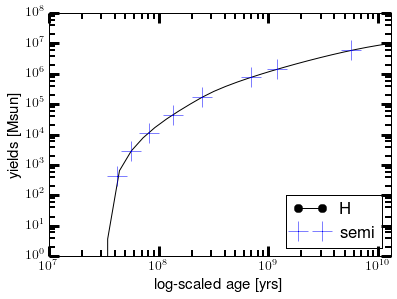

In [38]:
#following inside function wiersma09_efolding

#if timemin ==0:
#    timemin=1

from scipy.integrate import dblquad
def spline1(x):
    #x=t
    minm_prog1a=3
    #if minimum progenitor mass is larger than 3Msun due to IMF range:
    #if self.imf_bdys[0]>3:
    #    minm_prog1a=self.imf_bdys[0]
    return max(minm_prog1a,10**spline_lifetime(np.log10(x)))


def f_wd_dtd(m,t):
                #print 'time ',t
                #print 'mass ',m
                mlim=10**spline_lifetime(np.log10(t))
                maxm_prog1a=8
                #if maximum progenitor mass is smaller than 8Msun due to IMF range:
                #if 8>self.imf_bdys[1]:
                #        maxm_prog1a=self.imf_bdys[1]
                if mlim>maxm_prog1a:
                        return 0
                else:
                        #Delay time distribution function (DTD)
                        tau=  exp_dtd
                        mmin=0
                        mmax=0
                        inte=0
                #follwing is done in __imf()
                def g2(mm):
                    return mm*mm**-2.35
                norm=1./quad(g2,1,30)[0]
                #print 'IMF test',norm*m**-2.35
                #imf normalized to 1Msun
                return  norm*m**-2.35* np.exp(-t/tau)/tau
                
a= 0.01 #normalization parameter
#if spline(np.log10(t))
#a=1e-3/()
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   )
n1a= a* dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   
# in principle since normalization is set: nb_1a_per_m the above calculation is not necessary anymore
Yield_tot=n1a*1e11*0.1 *1 #7 #special factor
print Yield_tot_sim
print Yield_tot
print 'Should be : ', Yield_tot_sim/Yield_tot
s1.plot_mass(specie='H',source='sn1a',label='H',color='k',shape='-',marker='o',markevery=800)
yields1=[]
ages1=[]
a= 0.01 #normalization parameter
a=1e-3/(dblquad(f_wd_dtd,0,1.3e10,lambda x: spline1(x), lambda x: 8)[0]   )
for m1 in m:
    t=ages[m.index(m1)]
    yields= a* dblquad(f_wd_dtd,0,t,lambda x: spline1(x), lambda x: 8)[0] *1e11*0.1 #special factor 
    yields1.append(yields)
    ages1.append(t)
plt.plot(ages1,yields1,marker='+',linestyle='',markersize=20,label='semi')
plt.legend(loc=4)